In [163]:
import pandas as pd
import tushare as ts
ts.set_token('')
pro = ts.pro_api()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/fengjie/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['close']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [184]:
# ts_code = '512910.SH' # 中证100
# ts_code = '510050.SH' # 上证50
# ts_code = '159910.SZ' # 深证F120 
# ts_code = '510300.SH' # 沪深300
# ts_code = '510500.SH' # 中证500 
# ts_code = '512880.SH' # 上证红利
# ts_code = '159907.SZ' # 中小300
# ts_code = '159952.SZ' # 创业ETF 

ts_code = '513500.SH' # 标普500
# ts_code = '159941.SZ' # 纳指ETF
# ts_code = '513000.SH' # 日经225 
# ts_code = '513030.SH' # 德国30
# ts_code = '159920.SZ' # 恒生ETF

# ts_code = '159928.SZ' # 消费
# ts_code = '159953.SZ' # 工业
# ts_code = '159938.SZ' # 医药
# ts_code = '512980.SH' # 传媒
# ts_code = '159940.SZ' # 金融
# ts_code = '159936.SZ' # 可选
# ts_code = '512580.SH' # 环保
# ts_code = '159939.SZ' # 信息技术
# ts_code = '159952.SZ' # 证券
# ts_code = '512680.SH' # 军工
# ts_code = '512200.SH' # 房地产 
# ts_code = '161631.SZ' # 人工智能


start='20190101'
end='20190820'
holidays = [datetime.datetime(2018, 2, 21), 
            datetime.datetime(2018, 10, 3), 
            datetime.datetime(2019, 2, 4), 
            datetime.datetime(2019, 2, 5), 
            datetime.datetime(2019, 2, 6), 
            datetime.datetime(2019, 5, 1), 
            datetime.datetime(2019, 10, 2)]


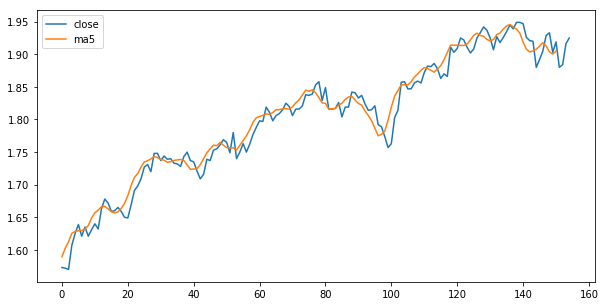

In [185]:
def plotfund(ts_code, start, end):
    df = pro.fund_daily(ts_code=ts_code, start_date=start, end_date=end)
    df['ma5']=df['close'].rolling(window=5).mean()
    df1 = df.iloc[::-1]
    df1[['close','ma5']].plot(kind='line',use_index=False, figsize=(10,5))
    
plotfund(ts_code, start, end)

In [186]:
# fixed_investment 每周定投数额
# feesrate 交易费率
def WeeklyInvestments(ts_code, start, end, weekmask = 'Mon', fixed_investment = 1000, feesrate = 0.00025):
    df = pro.fund_daily(ts_code=ts_code, start_date=start, end_date=end)
    dates = pd.bdate_range(start=start, end=end, weekmask = weekmask, holidays = holidays, freq='C').strftime("%Y%m%d").tolist()
    num = len(dates)
    totalcount = 0
    print(num)
    initvalue = float(df.loc[df['trade_date'].isin([dates[0]]), 'close'])
    for i in range(num):
        target = week_investment*(i+1) # 每周定投固定数额累计
        value = float(df.loc[df['trade_date'].isin([dates[i]]), 'close']) # 当前收盘值
        count = int(week_investment/value+0.5) # 当期应购数量
        totalcount = totalcount + count # 当前已拥有数量
        equity = totalcount*value # 当前净值
        income = equity - target - target*feesrate # 收益绝对值
        incomepercent = income / target * 100 # 定投收益百分比
        initpercent = (value-initvalue)/initvalue *100 # 相对初始收益百分比
        print("%2d %s: %5d\t%.3f\t%d\t%.2f  \t%.2f    \t%.2f%%\t\t%.2f%%"%(i, dates[i], target, value, count, equity, income, incomepercent, initpercent))
WeeklyInvestments(ts_code, start, end)

32
 0 20190107:  1000	1.607	622	999.55  	-0.70    	-0.07%		0.00%
 1 20190114:  2000	1.621	617	2008.42  	7.92    	0.40%		0.87%
 2 20190121:  3000	1.678	596	3079.13  	78.38    	2.61%		4.42%
 3 20190128:  4000	1.659	603	4044.64  	43.64    	1.09%		3.24%
 4 20190211:  5000	1.698	589	5139.85  	138.60    	2.77%		5.66%
 5 20190218:  6000	1.748	572	6291.05  	289.55    	4.83%		8.77%
 6 20190225:  7000	1.740	575	7262.76  	261.01    	3.73%		8.28%
 7 20190304:  8000	1.750	571	8303.75  	301.75    	3.77%		8.90%
 8 20190311:  9000	1.716	583	9142.85  	140.60    	1.56%		6.78%
 9 20190318: 10000	1.761	568	10382.86  	380.36    	3.80%		9.58%
10 20190325: 11000	1.740	575	11259.54  	256.79    	2.33%		8.28%
11 20190401: 12000	1.777	563	12499.42  	496.42    	4.14%		10.58%
12 20190408: 13000	1.819	550	13795.30  	792.05    	6.09%		13.19%
13 20190415: 14000	1.815	551	14765.02  	761.52    	5.44%		12.94%
14 20190422: 15000	1.816	551	15773.78  	770.03    	5.13%		13.01%
15 20190429: 16000	1.853	540	17095.78  	1091.78